# Portfolio Maximization by Mean-Variance Analysis

[*********************100%%**********************]  176 of 176 completed


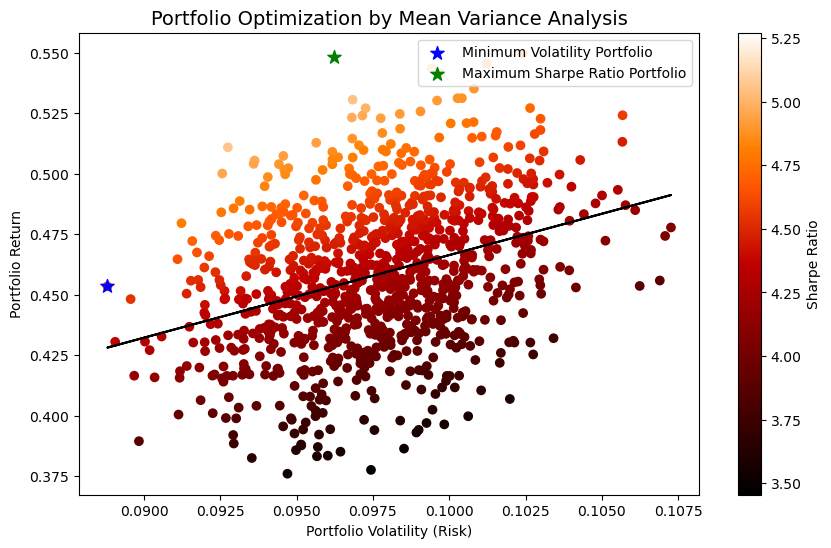


Optimal Weights (Max Sharpe Ratio):
CSCO: 0.38%
MSI: 0.85%
HPE: 0.17%
ZBRA: 0.38%
JNPR: 0.07%
ADBE: 0.60%
MSFT: 0.26%
ORCL: 0.11%
PLTR: 0.52%
PANW: 0.44%
SNPS: 0.68%
CRWD: 0.94%
FTNT: 0.14%
GPN: 0.99%
CPAY: 0.03%
GDDY: 0.56%
GEN: 0.74%
VRSN: 1.20%
FFIV: 0.72%
AKAM: 0.20%
ACN: 0.65%
IBM: 0.50%
FI: 0.60%
FIS: 0.25%
IT: 0.63%
CTSH: 0.19%
LDOS: 0.93%
BR: 0.75%
CDW: 0.10%
EPAM: 1.12%
JKHY: 0.77%
JPM: 0.40%
BAC: 0.06%
WFC: 0.79%
C: 0.47%
BK: 1.14%
BX: 0.04%
BLK: 0.05%
KKR: 1.19%
AMP: 1.21%
RJF: 0.03%
STT: 0.90%
TROW: 0.28%
NTRS: 0.88%
PFG: 1.09%
BEN: 0.13%
IVZ: 0.30%
SPGI: 0.03%
ICE: 0.06%
MCO: 0.04%
CME: 1.01%
MSCI: 0.37%
NDAQ: 0.62%
CBOE: 0.99%
FDS: 0.62%
NFLX: 0.54%
DIS: 0.01%
LYV: 0.71%
WBD: 0.16%
FOX: 0.96%
NWS: 0.32%
PARA: 0.85%
TMUS: 0.81%
CMCSA: 0.77%
T: 0.34%
VZ: 0.34%
CHTR: 1.08%
EA: 0.02%
TTWO: 0.23%
SW: 0.77%
PKG: 1.03%
BALL: 0.45%
IP: 0.82%
AMCR: 0.70%
AVY: 0.08%
BKNG: 0.78%
ABNB: 1.02%
RCL: 1.25%
CCL: 0.04%
EXPE: 0.83%
NCLH: 0.52%
MAR: 0.01%
HLT: 0.77%
WMT: 0.15%
COST: 0.48%
T

In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

'''
'CSCO',
'JPM',
'NFLX',
'SW',
'WMT',
'HCA',
'CTAS',
'WELL',
'WMB', 
'VST', 
'LIN',
'IEF'
'''
assets = ['CSCO', 'MSI', 'HPE', 'ZBRA', 'JNPR',
          'ADBE', 'MSFT', 'ORCL', 'PLTR', 'PANW', 'SNPS', 'CRWD', 'FTNT', 'GPN', 'CPAY', 'GDDY', 'GEN', 'VRSN', 'FFIV', 'AKAM',
          'ACN', 'IBM', 'FI', 'FIS', 'IT', 'CTSH', 'LDOS', 'BR', 'CDW', 'EPAM', 'JKHY',

          'JPM', 'BAC', 'WFC', 'C', 'BK',
          'BX', 'BLK', 'KKR', 'AMP', 'RJF', 'STT', 'TROW', 'NTRS', 'PFG', 'BEN', 'IVZ',
          'SPGI', 'ICE', 'MCO', 'CME', 'MSCI', 'NDAQ', 'CBOE', 'FDS',
          
          'NFLX', 'DIS', 'LYV', 'WBD', 'FOX', 'NWS', 'PARA',
          'TMUS', 'CMCSA', 'T', 'VZ', 'CHTR',
          'EA', 'TTWO',
          
          'SW', 'PKG', 'BALL', 'IP', 'AMCR', 'AVY',
          'BKNG', 'ABNB', 'RCL', 'CCL', 'EXPE', 'NCLH',
          'MAR', 'HLT',
          
          'WMT', 'COST', 'TGT', 'DG', 'DLTR',
          'PM', 'MO',
          'PG', 'CL', 'KVUE', 'KMB', 'CHD', 'EL', 'CLX',
          
          'HCA', 'DVA', 'UHS',
          'ZTS', 'VTRS', 'CTLT',
          'ABT', 'SYK', 'BSX', 'MDT', 'EW', 'GEHC', 'DXCM', 'ZBH', 'STE', 'PODD',
          
          'WELL', 'VTR', 'DOC',
          'CBRE', 'CSGP',
          'AMT', 'EQIX', 'DLR', 'CCI', 'IRM', 'SBAC', 'WY',
          
          'WMB', 'OKE', 'KMI', 'TRGP',
          'SLB', 'BKR', 'HAL',
          'XOM', 'CVX',
          
          'VST', 'NRG', 
          'GEV', 'CEG',
          'ATO', 'NI',
          
          'LIN', 'SHW', 'ECL', 'APD', 'DD', 'LYB', 'PPG', 'IFF', 'ALB', 'EMN',
          'MLM', 'VMC',
          'CTVA', 'CF', 'MOS', 'FMC',
          
          'CTAS', 'CPRT', 'AMTM',
          'GE', 'RTX', 'LMT', 'BA', 'GD', 'NOC', 'TDG', 'LHX', 'AXON', 'HWM', 'TXT', 'HII',
          'UNP', 'CSX', 'NSC', 'WAB', 'IEF']				

# datetime.today().strftime('%Y-%m-%d')
start_date = '2023-11-01'
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(assets, start = start_date, end = end_date)['Adj Close']

# Step 1 - calculate daily returns, mean returns, and covariance
returns = data.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Step 2 - number of portfolio simulations
num_portfolios = 1000
results = np.zeros((3, num_portfolios))     # 3 by 1000 (n - # of portfolios) matrix. 1st - portfolio returns, 2nd - portfolio risk, and 3rd - Sharpe Ratio
weight_records = []

np.random.seed(42)  # Setting a random seed for reproducibility i.e constant random number sequence
for i in range(num_portfolios):

    # Random portfolio weights
    weights = np.random.random(len(assets))

    ''' 
    for example weights = [0.8, 0.2]
    sum of weights = 1.0 (0.8 + 0.2 = 1)
    weights_1 = 0.8 / 1.0 = 0.8
    weights_2 = 0.2 / 1.0 = 0.2

    if weights = [0.6, 0.5]
    sum of weights = 1.1 
    weights_1 = 0.6/1.1 = 0.5454
    weights_2 = 0.4545
    sum = 1 (normalized)
    '''

    weights = weights / np.sum(weights)
    weight_records.append(weights)

    # Portfolio return = weight of assets * mu of assets
    portfolio_return = np.dot(weights, mean_returns) * 252

    # Portfolio volatility: sigma = square root of [(w transpose) * covariance * w-vector]
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

    # Sharpe Ratio = returns / volatility
    sharpe_ratio = (portfolio_return - 0.0411) / portfolio_volatility

    # Store the results in the results matrix
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Finding maximum sharpe ratio and minimum volatility indices
min_volatility = np.argmin(results[1])
max_sharpe_ratio = np.argmax(results[2])

# Filtering portfolios to find a cetain one with maximum sharpe ratio and minimum volatility
min_volatility_portfolio = results[:, min_volatility]
max_sharpe_ratio_portfolio = results[:, max_sharpe_ratio]
best_weights = weight_records[max_sharpe_ratio]

# Plotting
plt.figure(figsize = (10, 6))
plt.scatter(results[1], results[0], c = results[2, :], cmap = 'gist_heat', marker = 'o')
plt.colorbar(label = 'Sharpe Ratio')
plt.scatter(min_volatility_portfolio[1], min_volatility_portfolio[0], marker = '*', color = 'blue', s = 100, label = 'Minimum Volatility Portfolio')
plt.scatter(max_sharpe_ratio_portfolio[1], max_sharpe_ratio_portfolio[0], marker = '*', s = 100, color = 'green', label = 'Maximum Sharpe Ratio Portfolio')
plt.title('Portfolio Optimization by Mean Variance Analysis', size = 14)
plt.xlabel('Portfolio Volatility (Risk)')
plt.ylabel('Portfolio Return')
plt.legend(loc = 'upper right')

# Linear regression
x = results[1].reshape(-1, 1)
y = results[0]
model = LinearRegression()
model.fit(x, y)
predicted_returns = model.predict(x)
plt.plot(results[1], predicted_returns, color = 'black', linestyle = '-', label = 'Linear Regression Fit')
plt.show()

# Output the portfolio weights of the Max Sharpe Ratio portfolio
'''
weight_records[0] = [0.7, 0.3] 70% Nvidia and 30% Apple
weight_records[1] = [0.5, 0.5]
.
.
.
weight_records[499] = [0.2, 0.8] where 499 is the sharpe ratio (as an example)

linearly finds the weight with the highest sharpe ratio and outputs the optimal weights below

'''

print("\nOptimal Weights (Max Sharpe Ratio):")
for ticker, weight in zip(assets, best_weights):
    print(f"{ticker}: {weight * 100:.2f}%")

# Output the linear regression equation
print(f"\nLinear Regression Equation: Return = {model.coef_[0]:.4f} * Volatility + {model.intercept_:.4f}")

# Calculate the error (RMSE) of the regression fit (actual vs predicted)
rmse = np.sqrt(mean_squared_error(y, predicted_returns))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Output the maximum Sharpe Ratio
print(f"\nMaximum Sharpe Ratio: {max_sharpe_ratio_portfolio[2]:.4f}")


# Financial Breakdown

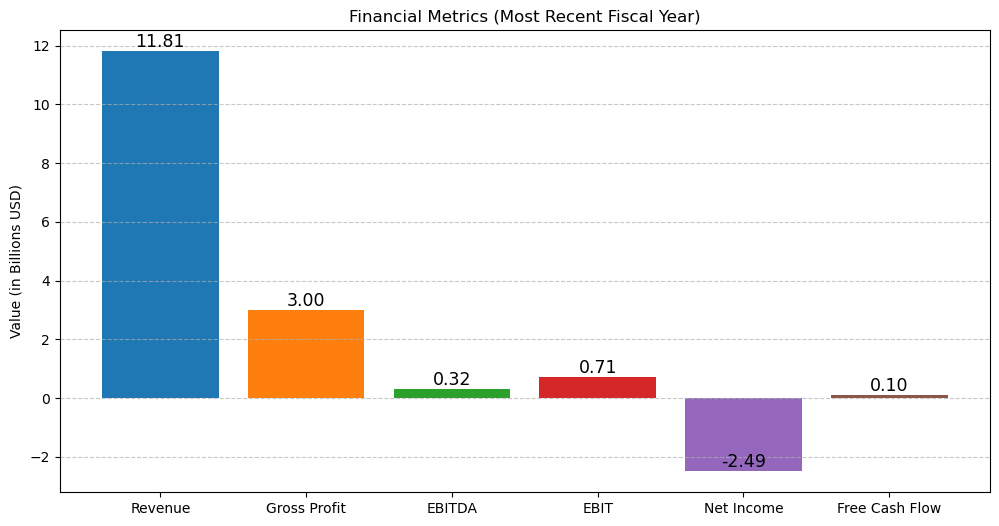

Date
1987-02-17 00:00:00-05:00    0.066667
1987-05-14 00:00:00-04:00    0.080000
1987-08-20 00:00:00-04:00    0.080000
1987-09-25 00:00:00-04:00    0.032000
1987-11-19 00:00:00-05:00    0.120000
                               ...   
2023-11-29 00:00:00-05:00    0.400000
2024-03-04 00:00:00-05:00    0.250000
2024-06-04 00:00:00-04:00    0.250000
2024-09-05 00:00:00-04:00    0.250000
2024-11-27 00:00:00-05:00    0.250000
Name: Dividends, Length: 155, dtype: float64


In [23]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker for Microsoft
ticker = "NEM"

# Fetch the financial data using yfinance
msft = yf.Ticker(ticker)

# Extract financial metrics from the financials and cashflow data
financials = msft.financials
cashflow = msft.cashflow

# Extract the most recent available data for the metrics
revenue = financials.loc["Total Revenue"].iloc[0] / 1e9  # Scale by 1e11
gross_profit = financials.loc["Gross Profit"].iloc[0] / 1e9
ebitda = financials.loc["EBITDA"].iloc[0] / 1e9
ebit = financials.loc["Operating Income"].iloc[0] / 1e9  # EBIT is Operating Income
net_income = financials.loc["Net Income"].iloc[0] / 1e9
free_cash_flow = cashflow.loc["Free Cash Flow"].iloc[0] / 1e9


# Data for the bar chart
metrics = ["Revenue", "Gross Profit", "EBITDA", "EBIT", "Net Income", "Free Cash Flow"]
values = [revenue, gross_profit, ebitda, ebit, net_income, free_cash_flow]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(metrics, values, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', size = 12.5)

# Add labels and title
plt.title("Financial Metrics (Most Recent Fiscal Year)")
plt.ylabel("Value (in Billions USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.show()

print(msft.dividends)


# Key Player Stock Price

[*********************100%%**********************]  1 of 1 completed


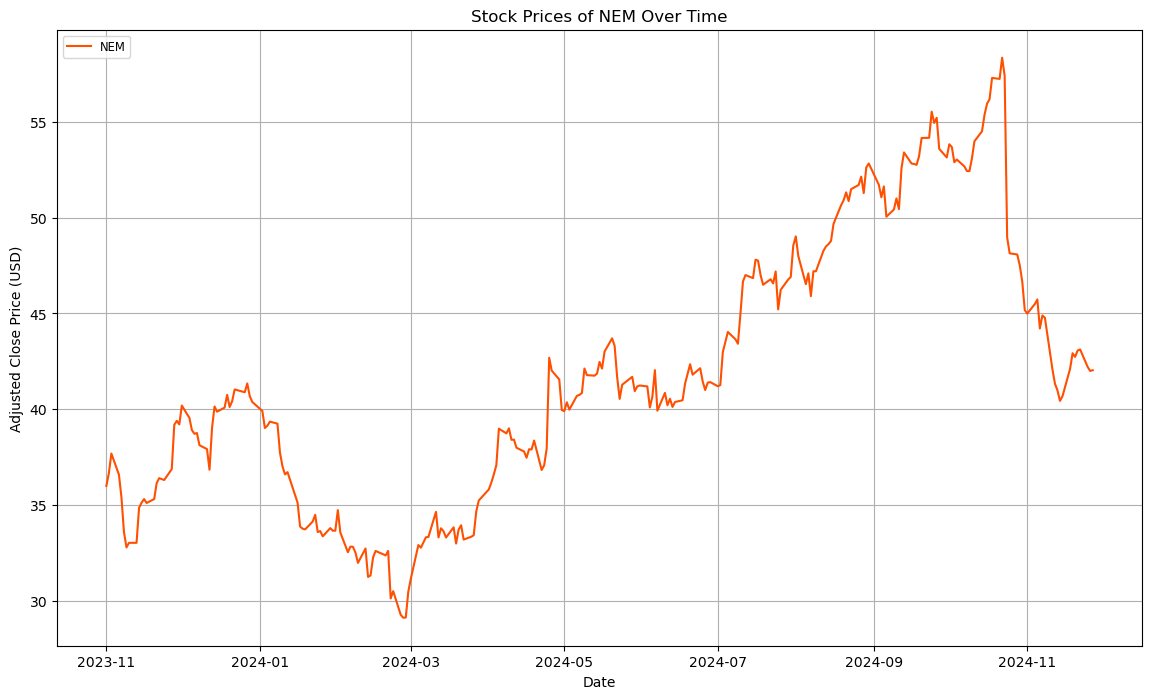

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker for Microsoft
ticker = 'NEM'

# Define the date range
start_date = '2023-11-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Download the data
data = yf.download(ticker, start = start_date, end = end_date)['Adj Close']

# Plot the stock prices
plt.figure(figsize=(14, 8))
plt.plot(data.index, data, label = ticker, color = '#FF4F00')
plt.title(f'Stock Prices of {ticker} Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)

# Display the plot
plt.show()


# ETF 

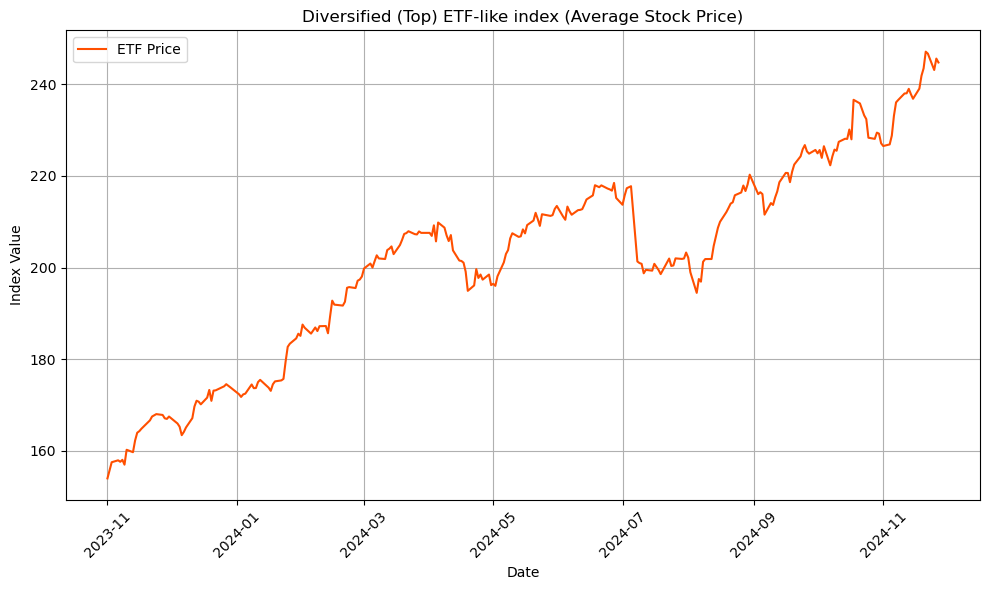

In [50]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Define the start and end dates
start_date = '2023-11-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# List of semiconductor company tickers
tickers = ['CSCO',
'JPM',
'NFLX',
'SW',
'WMT',
'HCA',
'CTAS',
'WELL',
'WMB', 
'VST', 
'LIN']

# Create an empty DataFrame to store ETF-like index values over time
index_data = pd.DataFrame()

# Fetch historical data for each ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date, end=end_date)
    index_data[ticker] = stock_data['Close']

# Calculate the ETF-like index by averaging the stock prices
index_data['ETF-like Index'] = index_data.mean(axis=1)

# Plot the ETF-like index over time
plt.figure(figsize=(10, 6))
plt.plot(index_data.index, index_data['ETF-like Index'], label='ETF Price', color = '#FF4F00')
plt.title('Diversified (Top) ETF-like index (Average Stock Price)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Balance Sheet

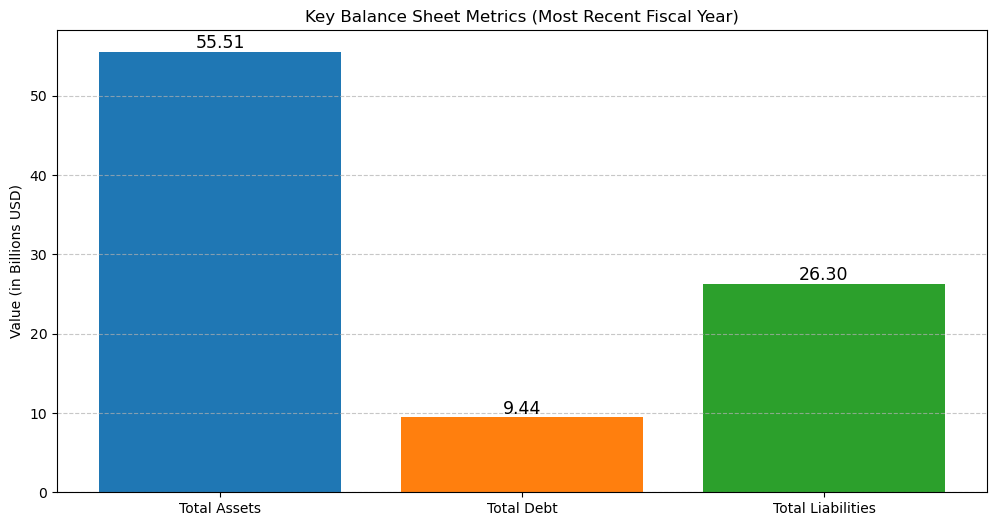

Dividends (Last Few Years):
Date
2022-09-07 00:00:00-04:00    0.55
2022-12-07 00:00:00-05:00    0.55
2023-03-08 00:00:00-05:00    0.40
2023-05-31 00:00:00-04:00    0.40
2023-09-06 00:00:00-04:00    0.40
2023-11-29 00:00:00-05:00    0.40
2024-03-04 00:00:00-05:00    0.25
2024-06-04 00:00:00-04:00    0.25
2024-09-05 00:00:00-04:00    0.25
2024-11-27 00:00:00-05:00    0.25
Name: Dividends, dtype: float64


In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for Berkshire Hathaway Class B
ticker = "NEM"

# Fetch the financial data using yfinance
brk = yf.Ticker(ticker)

# Extract balance sheet data
balance_sheet = brk.balance_sheet

# Handle cases where certain metrics may not exist
try:
    total_assets = balance_sheet.loc["Total Assets"].iloc[0] / 1e9  # Convert to billions
    total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[0] / 1e9
    total_debt = (balance_sheet.loc["Total Debt"].iloc[0]) / 1e9
except KeyError as e:
    print(f"KeyError: Missing data for {e}")
    total_assets = total_liabilities = net_debt = 0

# Data for the bar chart
metrics = ["Total Assets", "Total Debt", "Total Liabilities"]
values = [total_assets, total_debt, total_liabilities]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', size = 12.5)

# Add labels and title
plt.title("Key Balance Sheet Metrics (Most Recent Fiscal Year)")
plt.ylabel("Value (in Billions USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.show()

# Display dividend information
print("Dividends (Last Few Years):")
print(brk.dividends.tail(10))  # Show the most recent 10 dividends.


# Most Dividends

In [1]:
import pandas as pd
import yfinance as yf

# Read tickers from CSV file
tickers_df = pd.read_csv("companies.csv", header=None)
tickers = tickers_df[0].tolist()  # Assuming tickers are in the first column

dividends_dict = {}

# Fetch dividends for each ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)
    dividend = stock.get_dividends()
    if not dividend.empty:
        # Filter for dividends in 2024 only
        dividend_2024 = dividend[dividend.index.year == 2024]
        if not dividend_2024.empty:
            # Add the first unique dividend value for the ticker
            dividends_dict[ticker] = dividend_2024.values[0]  # Select only one value

# Create a DataFrame from the dictionary for better sorting and output
dividends_df = pd.DataFrame(list(dividends_dict.items()), columns=['Ticker', 'Dividend'])

# Remove duplicates based on dividend amounts (keeping the first ticker for each amount)
unique_dividends_df = dividends_df.drop_duplicates(subset=['Dividend'])

# Sort by dividend values in descending order
sorted_dividends_df = unique_dividends_df.sort_values(by='Dividend', ascending=False)

# Display the top 20 dividends along with their tickers
print(sorted_dividends_df.head(15))


    Ticker  Dividend
62     BLK     5.100
60    ACGL     5.000
73      GS     2.750
111     EG     1.750
40     IBM     1.660
80    MSCI     1.600
92     PNC     1.550
27    KLAC     1.450
17     ADP     1.400
64     AMP     1.350
6      TXN     1.300
39     ACN     1.290
106   ERIE     1.275
13    MPWR     1.250
67    TROW     1.240


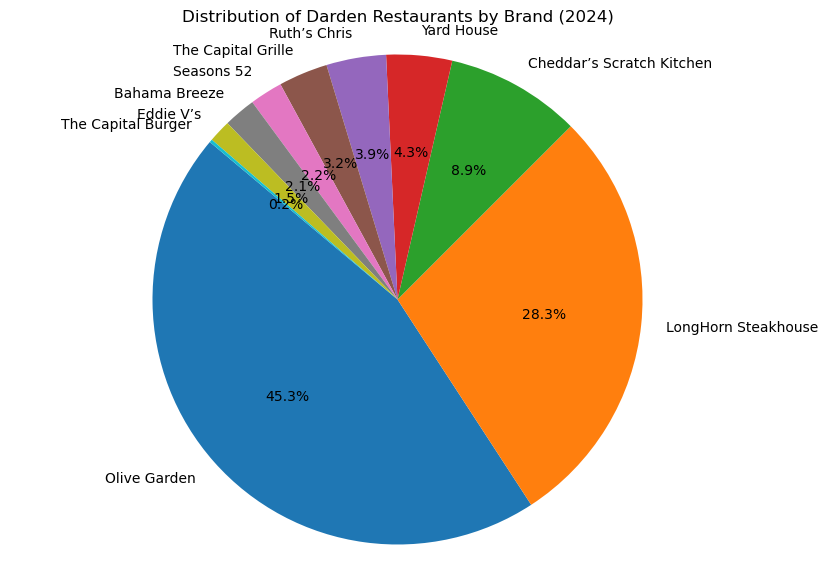

In [6]:
import matplotlib.pyplot as plt

# Data for the number of restaurants in 2024
brands = [
    "Olive Garden", "LongHorn Steakhouse", "Cheddar’s Scratch Kitchen",
    "Yard House", "Ruth’s Chris", "The Capital Grille",
    "Seasons 52", "Bahama Breeze", "Eddie V’s", "The Capital Burger"
]
restaurant_counts = [920, 575, 181, 88, 80, 66, 44, 43, 30, 4]

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(restaurant_counts, labels=brands, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Darden Restaurants by Brand (2024)")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()
